In [1]:
# import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in csv file
afib_df = pd.read_csv('../../../data/afib_data/new_coorteeqsrafva.csv')
afib_df.head()

diagnosi  ritmi   age  sex  height  weight       recording_date heart_axis  \
0    STACH      2  54.0    0     NaN     NaN  1993-09-01 11:31:17        MID   
1     AFLT      1  54.0    0     NaN     NaN  1993-09-01 11:31:17        MID   
2       SR      0  55.0    0     NaN     NaN  1992-06-09 15:52:36        LAD   
3    STACH      2  29.0    1   164.0    56.0  1997-02-08 18:33:30        NaN   
4    SBRAD      2  57.0    0     NaN     NaN  1994-09-13 10:21:14        MID   

   validated_by_human  strat_fold    age_group height_group weight_group  \
0               False           6  50-59 Years      Missing      Missing   
1               False           6  50-59 Years      Missing      Missing   
2                True          10  50-59 Years      Missing      Missing   
3                True           1  20-29 Years      1.60m +        <60kg   
4               False           1  50-59 Years      Missing      Missing   

   recording_year  
0            1993  
1            1993  
2            1992  
3            1997  
4            1994

## Exploratory Data Analysis

In [3]:
# set up size and color for sns
sns.set(rc={'figure.figsize':(12,2)})
plt.rcParams['figure.dpi'] = 300

### Diagnosis

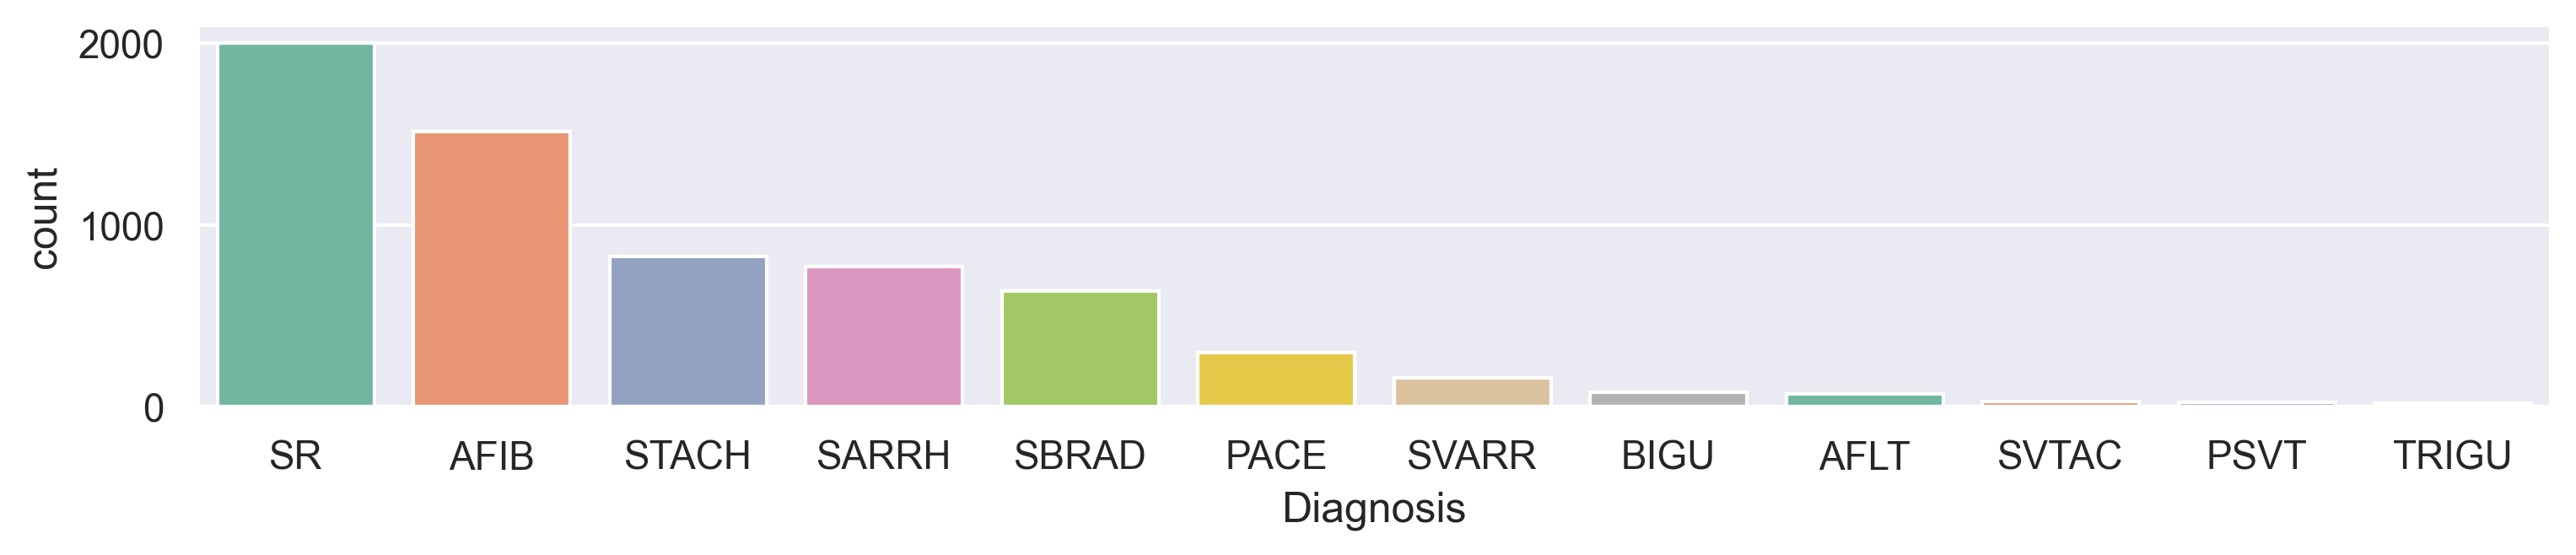

In [4]:
# countplot for diagnosi column
sns.countplot(x='diagnosi', data=afib_df, order = afib_df['diagnosi'].value_counts().index, palette='Set2')
plt.xlabel('Diagnosis')
plt.show()

In [5]:
# get number of rows for each category
afib_df['diagnosi'].value_counts().to_frame()

diagnosi
SR         2000
AFIB       1514
STACH       826
SARRH       772
SBRAD       637
PACE        296
SVARR       157
BIGU         82
AFLT         73
SVTAC        27
PSVT         24
TRIGU        20

There are 12 classes composed on the rhythm diagnosis from PTB-XL:
* **SR**: Sinus Rhythm
* **AFIB**: Atrial Fibrillation
* **STACH**: Sinus Tachycardia
* **SARRH**: Sinus Arrhythmia
* **SBRAD**: Sinus Bradycardia
* **PACE**: Normal Functioning Artificial Pacemaker
* **SVARR**: Supraventricular Arrhythmia
* **BIGU**: Bigeminal Pattern (unknown origin, SV or Ventricular)
* **AFLT**: Atrial Flutter
* **SVTAC**: Supraventricular Tachycardia
* **PSVT**: Paroxysmal Supraventricular Tachycardia
* **TRIGU**: Trigeminal Pattern (unknown origin, SV or Ventricular)

As expected, SR has the most rows, then AFIB, next is STACH and then SARRH. We can say that appoximately 2000 individuals in this dataset have Sinus Rhytm, 1514 individuals with Atrial Fibrillation, 826 individuals with Sinus Tachycardia and 772 individuals with Sinus Arrhythmia. In this dataset, there are very small number of individuals who have Supraventricular Tachycardia (27), Paroxysmal Supraventricular Tachycardia (24), and Trigeminal Pattern (20).

### Rhythm

As we recoded the values in the data wrangling phase, 0 is SR, 1 is AF, and 2 is VA.

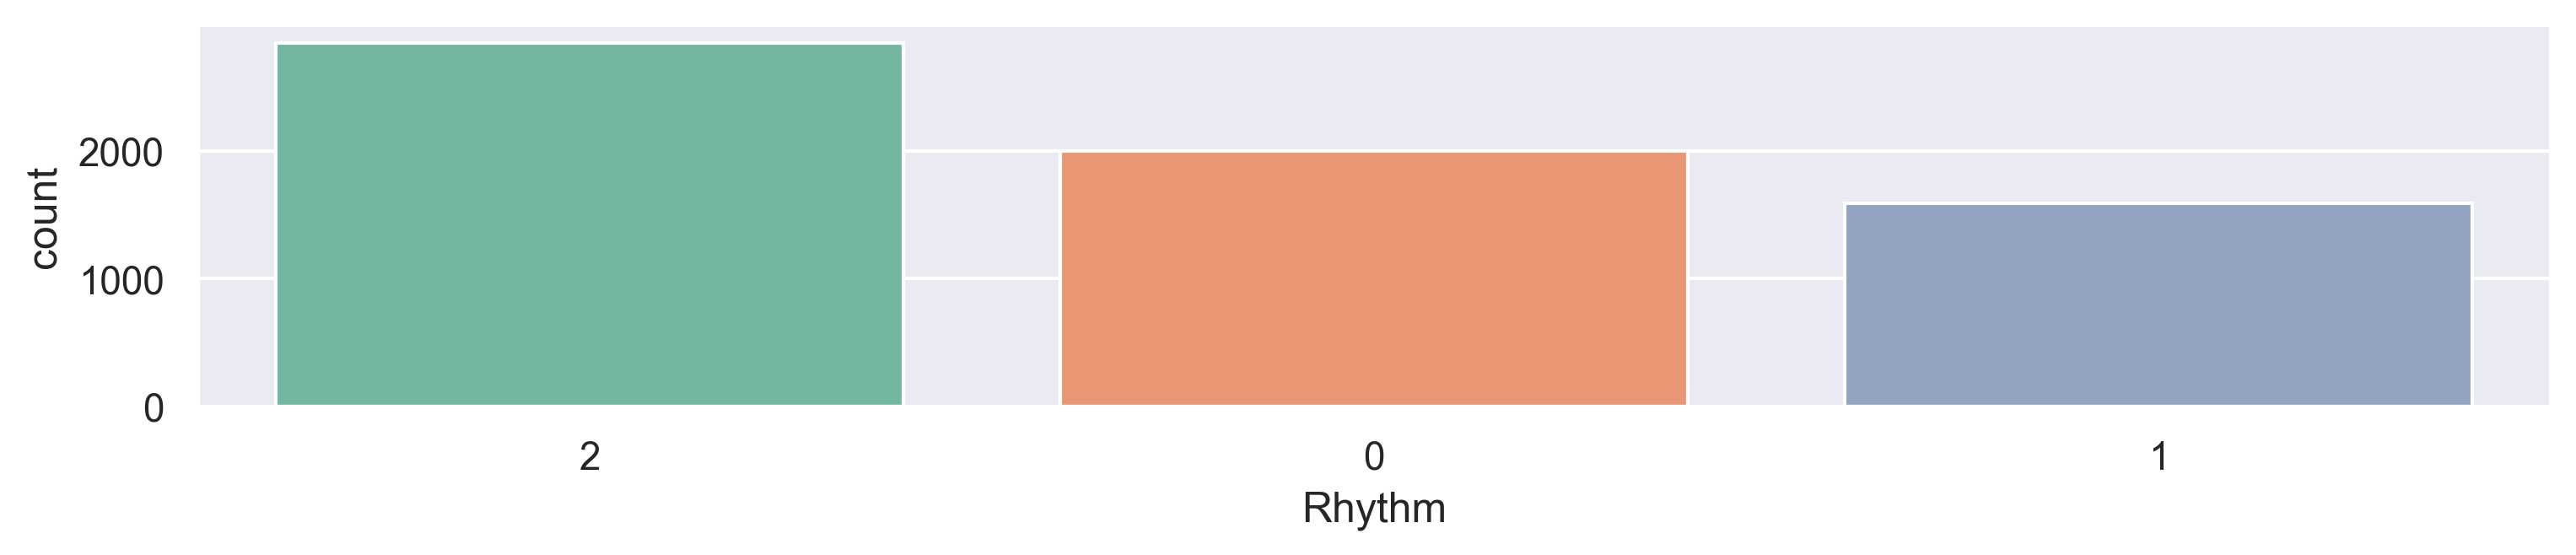

In [6]:
# countplot for ritmi column
sns.countplot(x='ritmi', data=afib_df, order = afib_df['ritmi'].value_counts().index, palette='Set2')
plt.xlabel('Rhythm')
plt.show()

In [7]:
# get number of rows for each category
afib_df['ritmi'].value_counts().to_frame()

ritmi
2   2841
0   2000
1   1587

2841 individuals who have the condition of having one of the possible other types of arrhythmia. 2000 individuals who have the condition of a normal ecg, and 1587 individuals who have the condition of having the specific arrhythmia of Atrial Fibrillation. The number for individuals with Afib reported in the ritmi column do not match with the number reported in the diagnosi column as there are more 73 individuals with Afib in the ritmi column.

### Age	

We will gain some insight into the age of individuals using the age_group column instead of the age column since each person has different age and the graph will contain lots of bars for different age if we use the age column. 

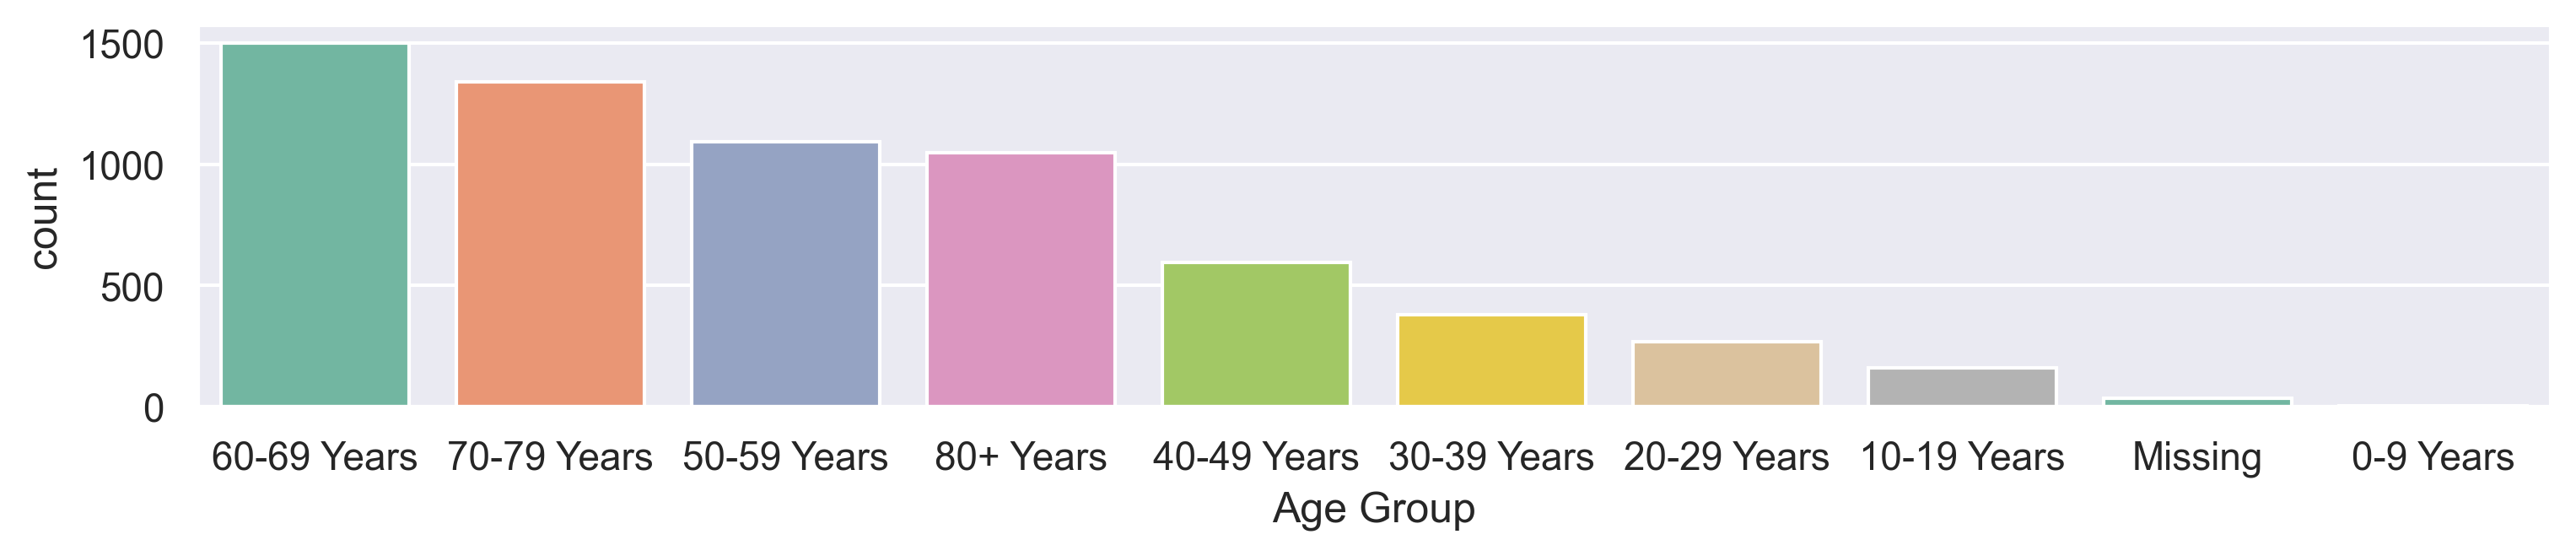

In [8]:
# countplot for age column
sns.countplot(x='age_group', data=afib_df, order = afib_df['age_group'].value_counts().index, palette='Set2')
plt.xlabel('Age Group')
plt.show()

In [9]:
# get number of rows for each category
afib_df['age_group'].value_counts().to_frame()

age_group
60-69 Years       1500
70-79 Years       1338
50-59 Years       1093
80+ Years         1049
40-49 Years        597
30-39 Years        380
20-29 Years        269
10-19 Years        162
Missing             34
0-9 Years            6

There are four outstanding groups, 60-69 Years (1500), 70-79 Years (1338), 50-59 Years (1093), and 80+ Years (1049). This totally make sense as most individuals who are from 50 to 80 years old and above usually have heart disease. For individuals who are young, they have lower risk of getting heart disease as 6 people from 0 to 9 years old, and 162 people from 20-29 years old.

In [10]:
# get min, max, and mean for age 
print('The minimum age of patients is {} years old.\nThe maximum age of patients is {} years old.\nThe average age of patients is {} years old'.format(afib_df['age'].min(), afib_df['age'].max(), round(afib_df['age'].mean(),0)))

The minimum age of patients is 4.0 years old.
The maximum age of patients is 95.0 years old.
The average age of patients is 62.0 years old


### Sex

Male is 0, female is 1

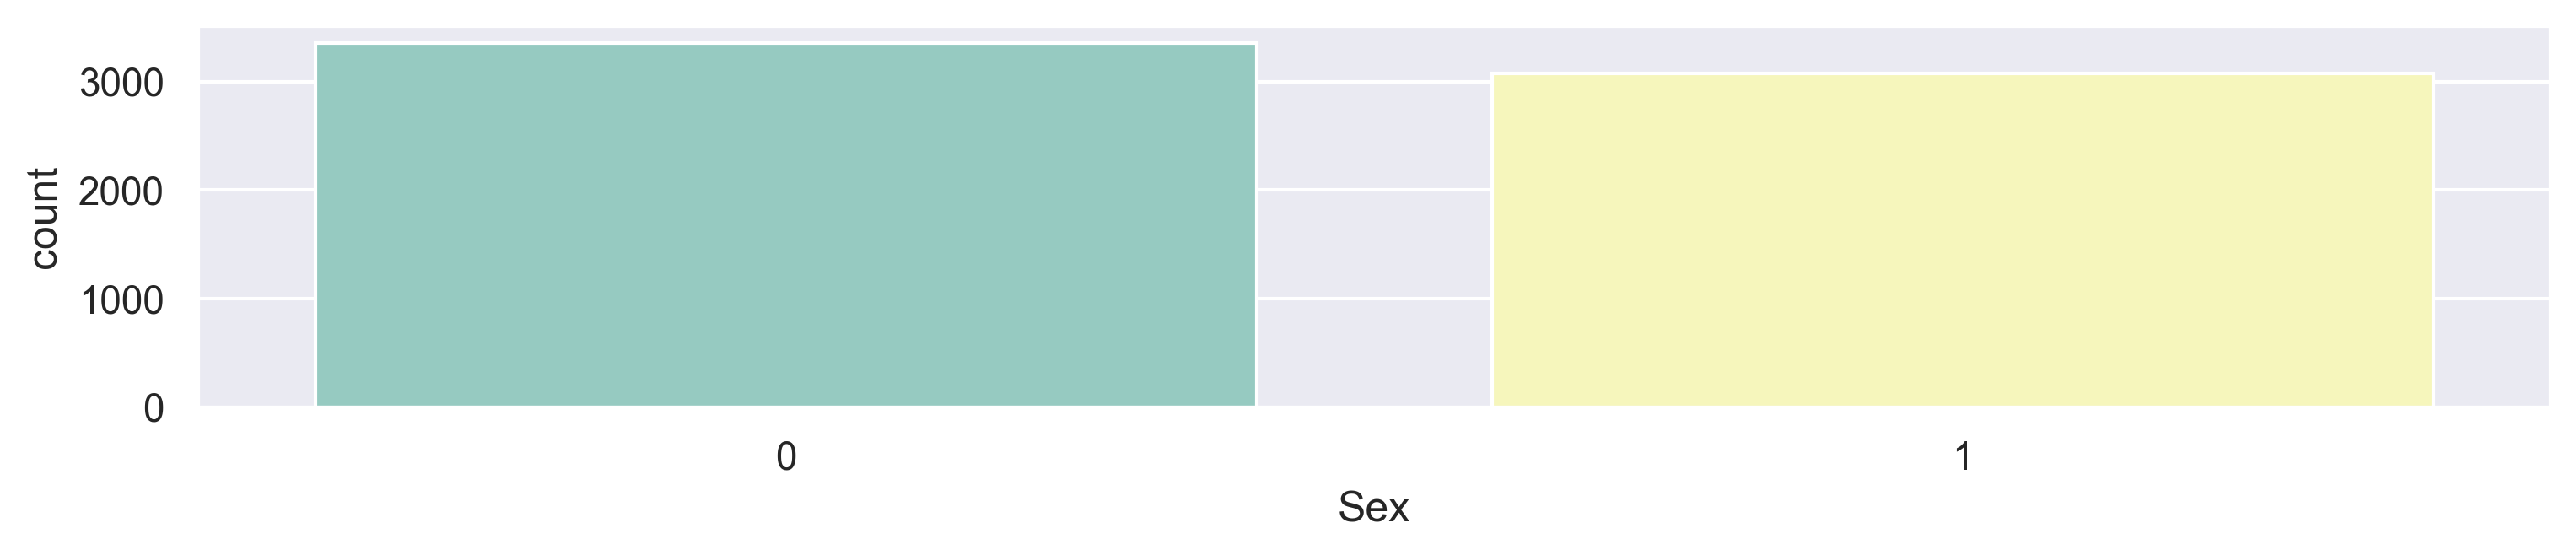

In [11]:
# countplot for sex column
sns.countplot(x='sex', data=afib_df, order = afib_df['sex'].value_counts().index, palette='Set3')
plt.xlabel('Sex')
plt.show()

In [12]:
# get number of rows for each category
afib_df['sex'].value_counts().to_frame()

sex
0  3353
1  3075

There are more male patients (3353) than females (3075), not a huge difference though.

### Height	

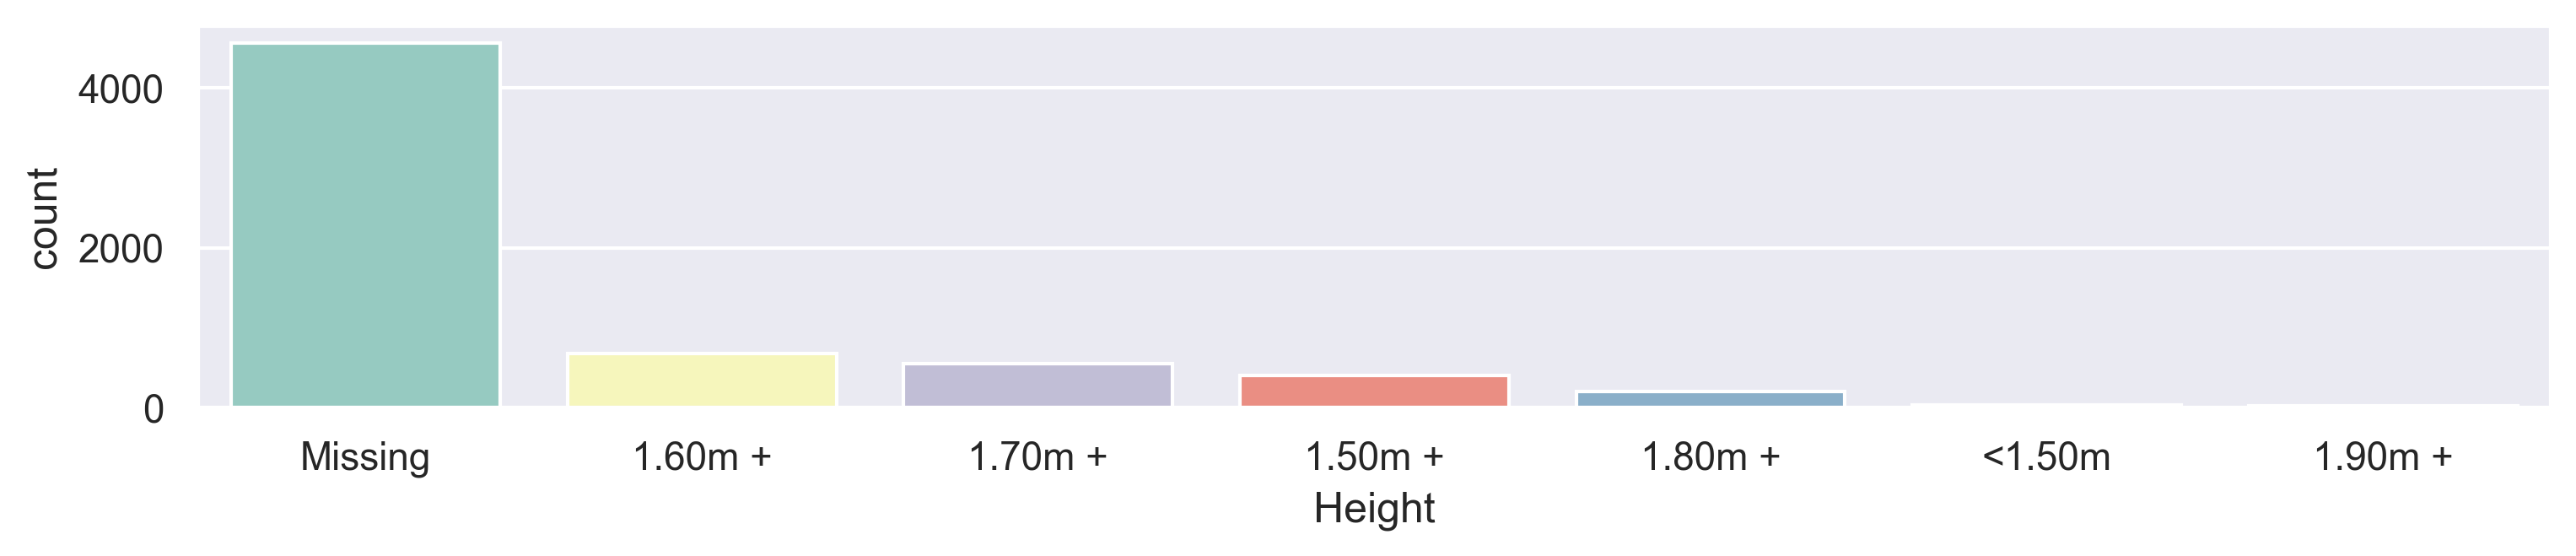

In [13]:
# countplot for height column
sns.countplot(x='height_group', data=afib_df, order = afib_df['height_group'].value_counts().index, palette='Set3')
plt.xlabel('Height')
plt.show()

In [14]:
# get number of rows for each category
afib_df['height_group'].value_counts().to_frame()

height_group
Missing          4562
1.60m +           677
1.70m +           548
1.50m +           394
1.80m +           200
<1.50m             32
1.90m +            15

We see a huge number of missing values in height_group column. Despite that, most patients are 1.60/1.70 m and above, very few patients are 1.90 m and above.

In [15]:
# get min, max, and mean for height
print('The minimum height of patients is {} m.\nThe maximum height of patients is {} m.\nThe average height of patients is {} m'.format(afib_df['height'].min()/100, afib_df['height'].max()/100, round(afib_df['height'].mean()/100,1)))

The minimum height of patients is 0.95 m.
The maximum height of patients is 1.95 m.
The average height of patients is 1.7 m


### Weight

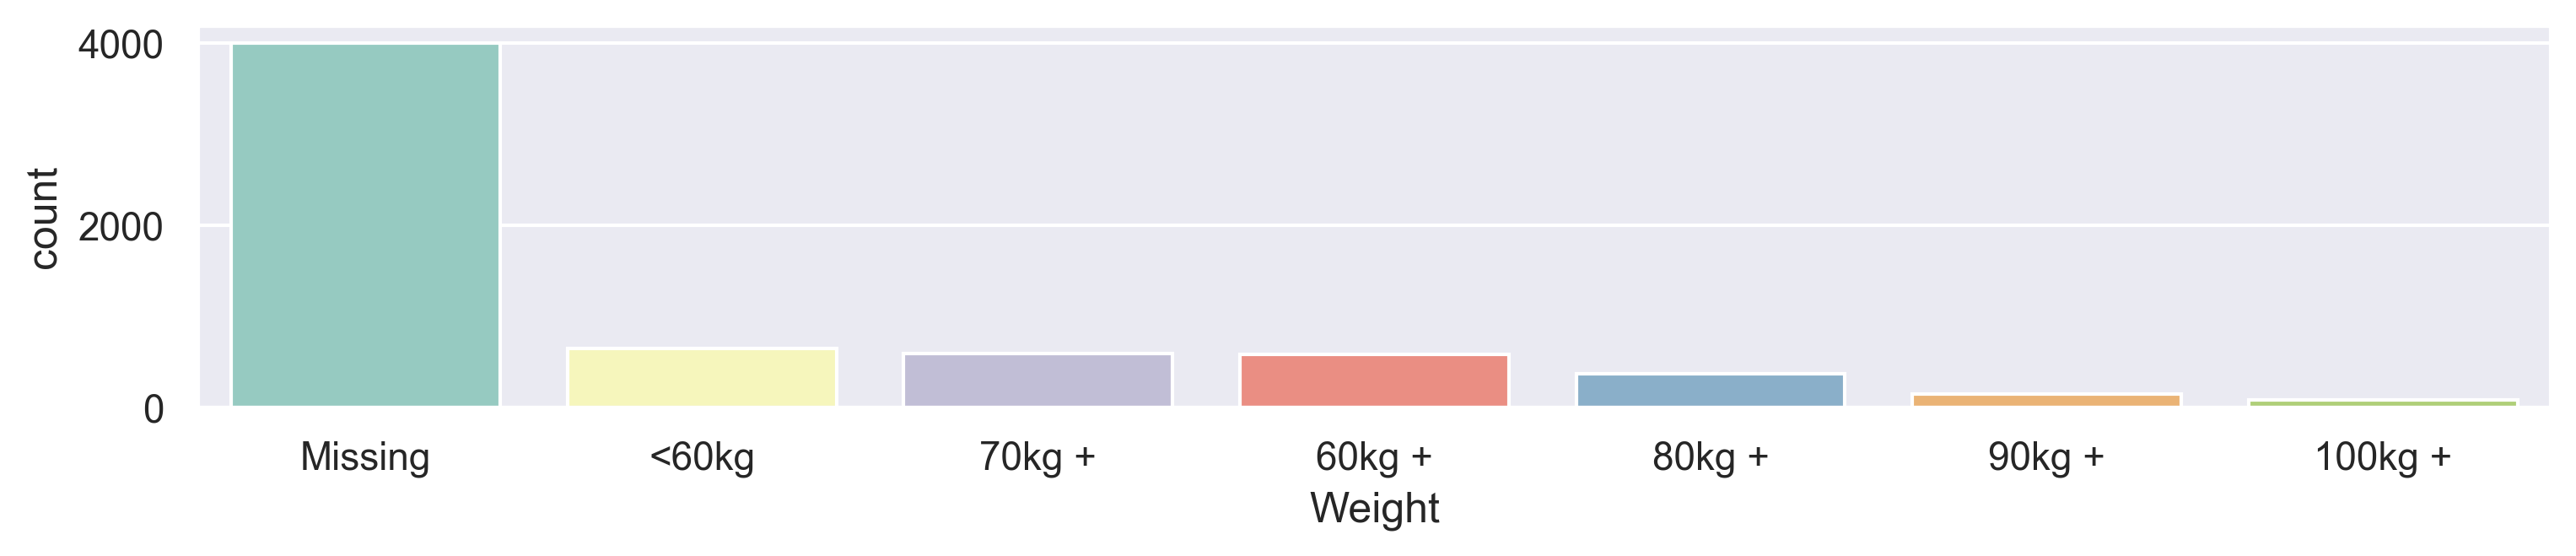

In [16]:
# countplot for weight column
sns.countplot(x='weight_group', data=afib_df, order = afib_df['weight_group'].value_counts().index, palette='Set3')
plt.xlabel('Weight')
plt.show()

In [17]:
# get number of rows for each category
afib_df['weight_group'].value_counts().to_frame()

weight_group
Missing          4000
<60kg             649
70kg +            590
60kg +            585
80kg +            373
90kg +            148
100kg +            83

Similar to height group, there are 4000 missing values in weight_group. Most patients are less than 60 kg, very few patients are 100 kg and above. Based on this, we can assume that weight is not associated with increasing high-risk of getting heart disease.

In [18]:
# get min, max, and mean for weight
print('The minimum weight of patients is {} kg.\nThe maximum weight of patients is {} kg.\nThe average weight of patients is {} kg'.format(afib_df['weight'].min(), afib_df['weight'].max(), round(afib_df['weight'].mean(),0)))

The minimum weight of patients is 5.0 kg.
The maximum weight of patients is 210.0 kg.
The average weight of patients is 70.0 kg


### Recording Year

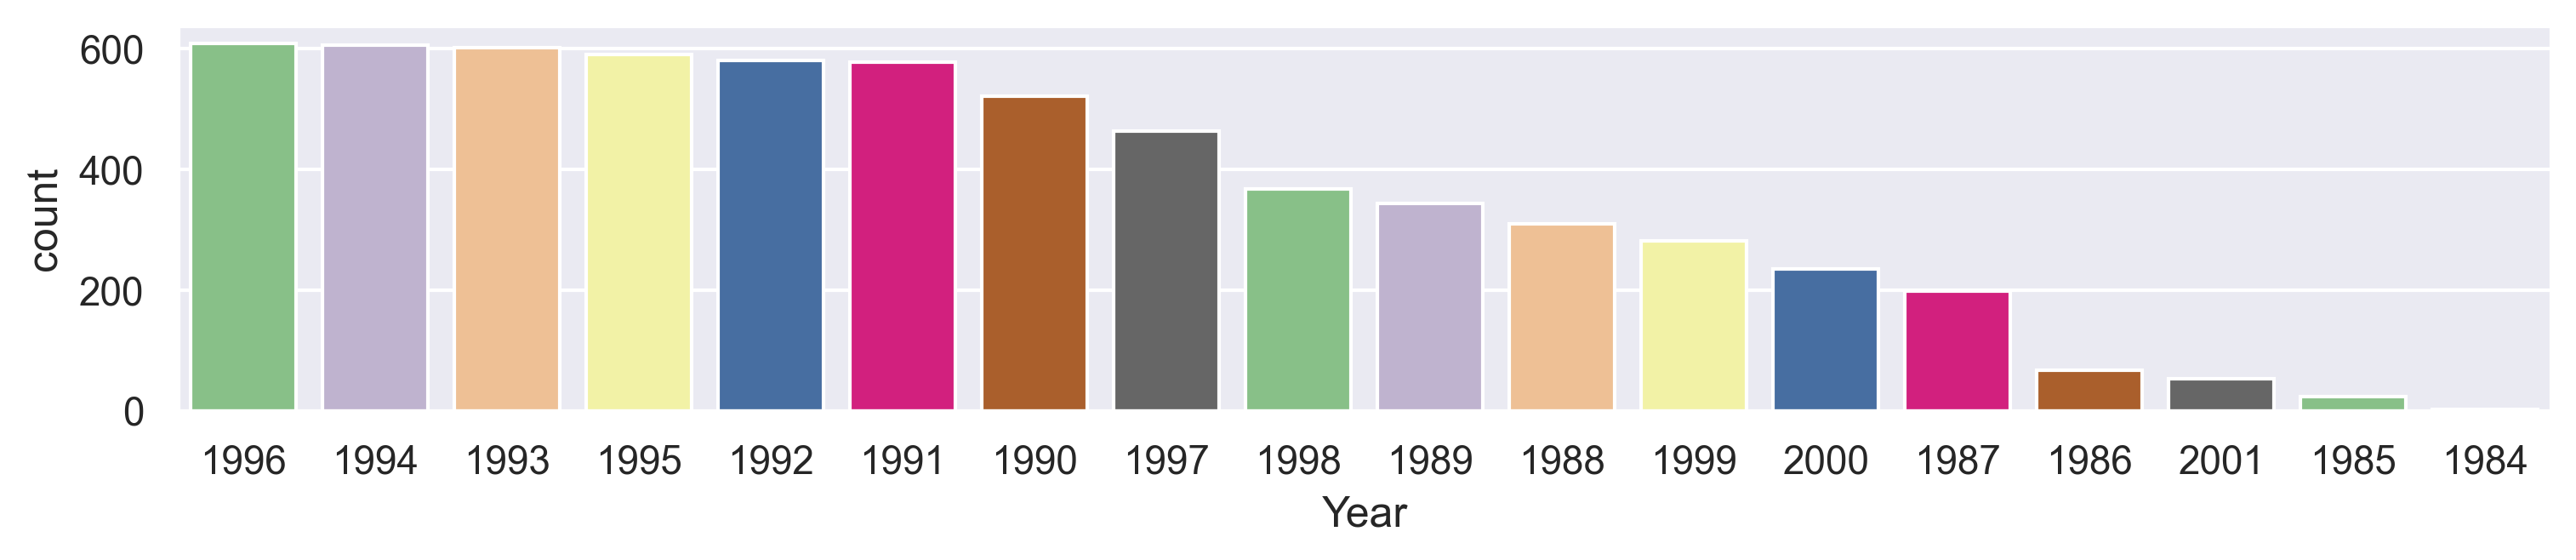

In [19]:
# countplot for recording year column
sns.countplot(x='recording_year', data=afib_df, order = afib_df['recording_year'].value_counts().index, palette='Accent')
plt.xlabel('Year')
plt.show()

In [20]:
# get number of rows for each category
afib_df['recording_year'].value_counts().to_frame()

recording_year
1996             608
1994             605
1993             601
1995             590
1992             580
1991             578
1990             521
1997             463
1998             368
1989             343
1988             309
1999             282
2000             235
1987             199
1986              67
2001              53
1985              23
1984               3

This dataset comprises lots of old records as 2001 is the latest year. We can see that the records started to be collected from 1984 to 2001. Specifically, most records are in 1996 (608), 1994 (605), 1993 (601) and 1995 (590). Only a few record are in 1984 (3), 1985 (23), and 2001 (53).

In [21]:
# get min, max, and mean for recording_year
print('The oldest year of record is {}.\nThe latest year of records is {}.\nThe average year of records is {}'.format(afib_df['recording_year'].min(), afib_df['recording_year'].max(), round(afib_df['recording_year'].mean(),0)))

The oldest year of record is 1984.
The latest year of records is 2001.
The average year of records is 1993.0


### Heartâ€™s Electrical Axis

These are the keywords of each code:
* MID - Normal axis
* LAD - Left axis deviation 
* ALAD - Abnormal LAD, extreme left axis deviation 
* RAD - Right axis deviation
* ARAD - Abnormal RAD, extreme right axis deviation
* AXR - Vertical axis
* AXL - Horizontal axis
* SAG - Saggital type (S1-S2-S3 Pattern)

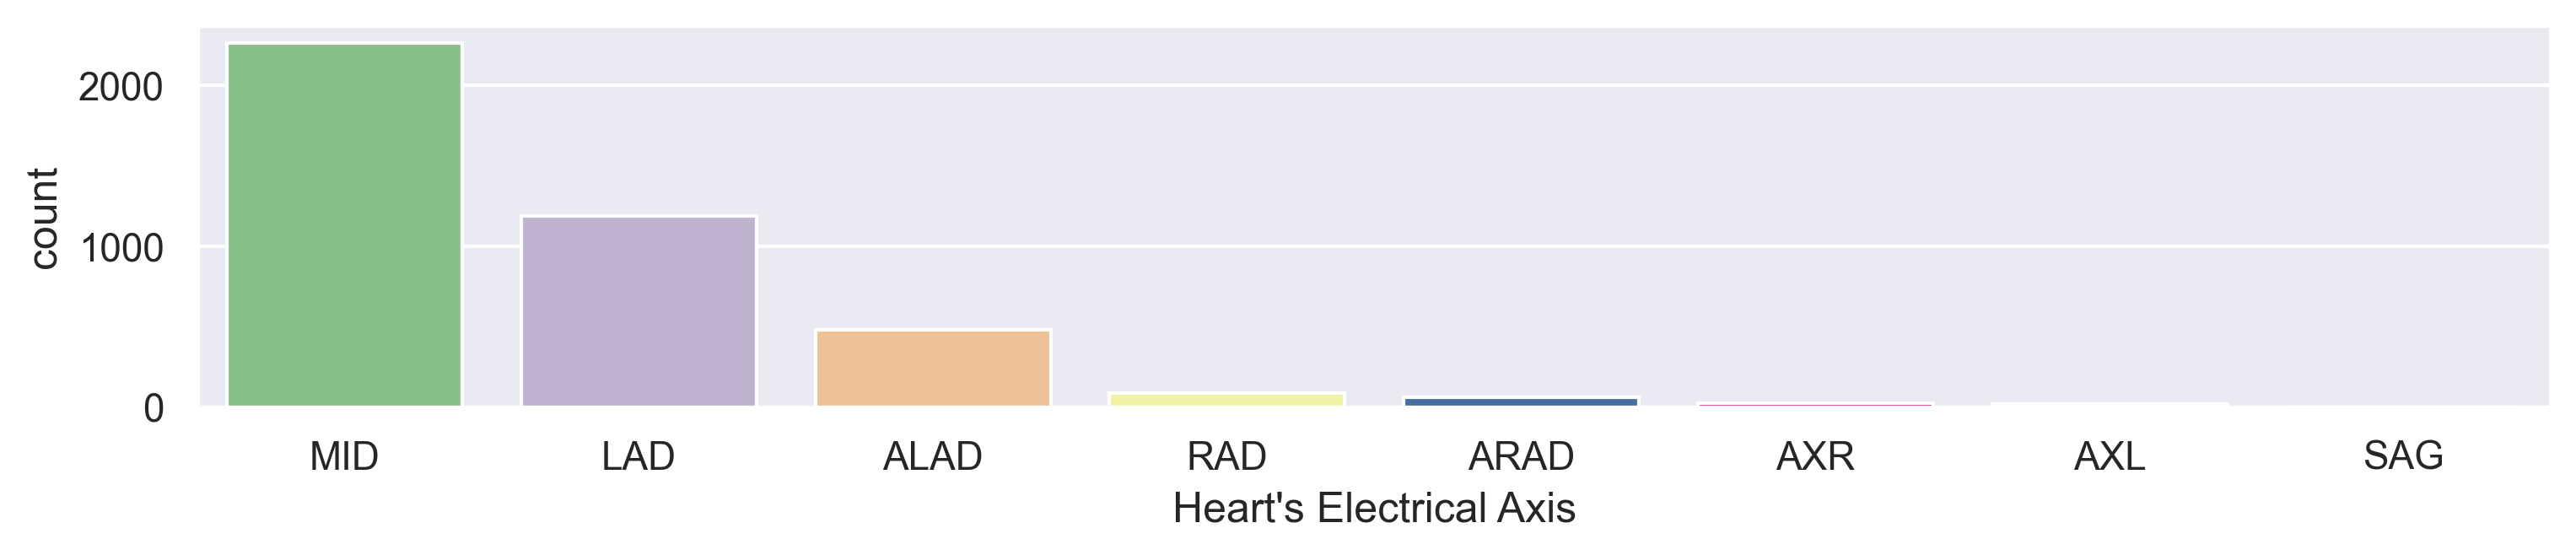

In [22]:
# countplot for heart_axis column
sns.countplot(x='heart_axis', data=afib_df, order = afib_df['heart_axis'].value_counts().index, palette='Accent')
plt.xlabel('Heart\'s Electrical Axis')
plt.show()

In [23]:
# get number of rows for each category
afib_df['heart_axis'].value_counts().to_frame()

heart_axis
MID         2262
LAD         1187
ALAD         482
RAD           87
ARAD          60
AXR           23
AXL           22
SAG            1

Based on the above dataframe, we can say that most have normal axis for heart's electrical axis as there are 2262 of them. 1187 patients with left axis deviation and 482 patients with Abnormal LAD, extreme left axis deviation. Only 1 patient who has Saggital type (S1-S2-S3 Pattern).

### Validated by Human